# КОНСТАНТНЫЙ ПРИЗНАК!!!

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import time

import optimization
import multiclass

import scipy
from sklearn.model_selection import train_test_split

%matplotlib inline

Включаем telegram бота

In [51]:
import telepyth
%telepyth -t 3034105624885803499

Use token 3034105624885803499.


## Experiment 1

Сравним работу полного и стохастического градиентного спуска

Загружаем датасет

In [150]:
from sklearn.datasets import load_svmlight_file

In [151]:
X, y = load_svmlight_file('real-sim')

# Adding constant feature
X = scipy.sparse.hstack((np.zeros((X.shape[0], 1)), X), format='csr')

In [152]:
X.shape

(72309, 20959)

Запускаем полный градиентный спуск

In [128]:
w_0 = np.random.normal(0, 10, X.shape[1])

In [169]:
gd_clf = optimization.GDClassifier(
    loss_function='binary_logistic',
    max_iter=10000,
    l2_coef=1e-5,
    tolerance=1e-5,
    step_alpha=1,
    step_beta=0
)

In [170]:
start_time = time.time()
gd_history = gd_clf.fit(X, y, trace=True, w_0=w_0)
%telepyth "Success\nExperiment 1\nFull GD\nFitting\ntime:\t{:.2f} s".format(time.time() - start_time)

'Success\nExperiment 1\nFull GD\nFitting\ntime:\t273.70 s'

Запускаем стохастический градиентный спуск

In [171]:
sgd_clf = optimization.SGDClassifier(
    loss_function='binary_logistic',
    max_iter=140000,
    l2_coef=1e-5,
    tolerance=1e-8,
    step_alpha=1,
    step_beta=0,
    batch_size=1
)

In [172]:
start_time = time.time()
sgd_history = sgd_clf.fit(X, y, log_freq=0.001, trace=True, w_0=w_0)
%telepyth "Success\nExperiment 1\nStochastic GD\nFitting\ntime:\t{:.2f} s".format(time.time() - start_time)

'Success\nExperiment 1\nStochastic GD\nFitting\ntime:\t100.96 s'

Зависимость значения функции от итерации (эпохи) метода

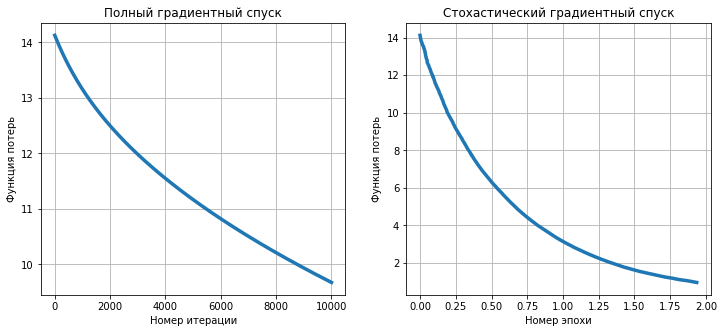

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(gd_history['func'], linewidth=3.5)
ax1.set_title("Полный градиентный спуск")
ax1.set_xlabel("Номер итерации")
ax1.set_ylabel("Функция потерь")
#ax1.set_ylim(0.18, 0.72)
ax1.grid()

ax2.plot(sgd_history['epoch_num'], sgd_history['func'], linewidth=3.5)
ax2.set_title("Стохастический градиентный спуск")
ax2.set_xlabel("Номер эпохи")
ax2.set_ylabel("Функция потерь")
#ax2.set_ylim(0.18, 0.72)
ax2.grid()

# plt.savefig("exp1_loss_iternum_weights.pdf")
plt.show()

Зависимость значения функции от реального времени работы метода

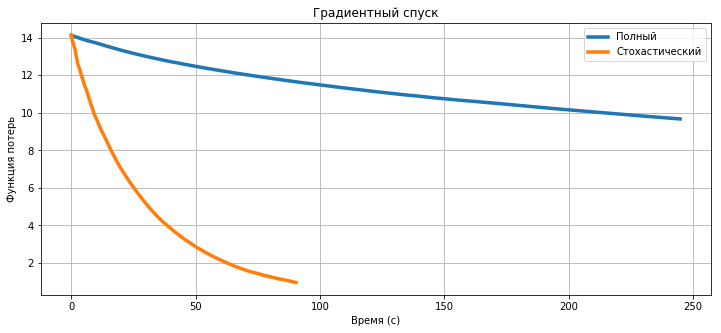

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

ax.plot(np.array(gd_history['time']).cumsum(), gd_history['func'], label='Полный', linewidth=3.5)
ax.plot(np.array(sgd_history['time']).cumsum(), sgd_history['func'], label='Стохастический', linewidth=3.5)
ax.set_title("Градиентный спуск")
ax.set_xlabel("Время (с)")
ax.set_ylabel("Функция потерь")
# ax.set_ylim(0.18, 0.72)
ax.legend()
ax.grid()

# plt.savefig("exp1_loss_time.pdf")
plt.show()

Зависимость значения точности от итерации (эпохи) метода

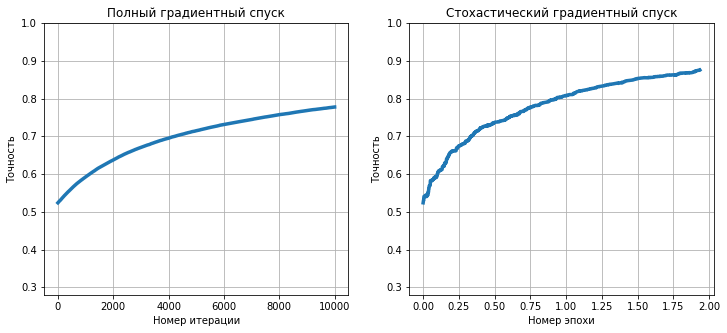

In [138]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(gd_history['accuracy'], linewidth=3.5)
ax1.set_title("Полный градиентный спуск")
ax1.set_xlabel("Номер итерации")
ax1.set_ylabel("Точность")
ax1.set_ylim(0.28, 1)
ax1.grid()

ax2.plot(sgd_history['epoch_num'], sgd_history['accuracy'], linewidth=3.5)
ax2.set_title("Стохастический градиентный спуск")
ax2.set_xlabel("Номер эпохи")
ax2.set_ylabel("Точность")
ax2.set_ylim(0.28, 1)
ax2.grid()

# plt.savefig("exp1_accuracy_iternum.pdf")
plt.show()

Зависимость точности от реального времени работы метода

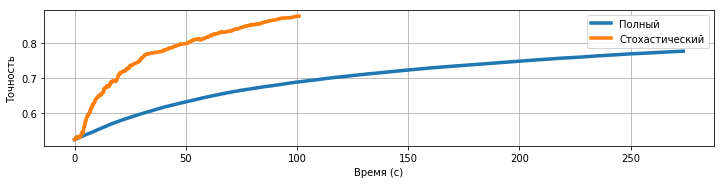

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(12, 2.5))

ax.plot(np.array(gd_history['time']).cumsum(), gd_history['accuracy'], label='Полный', linewidth=3.5)
ax.plot(np.array(sgd_history['time']).cumsum(), sgd_history['accuracy'], label='Стохастический', linewidth=3.5)
# ax.set_title("Градиентный спуск")
ax.set_xlabel("Время (с)")
ax.set_ylabel("Точность")
ax.legend()
ax.grid()

plt.savefig("exp1_accuracy_time_weights.pdf")
plt.show()

In [100]:
?plt.subplots

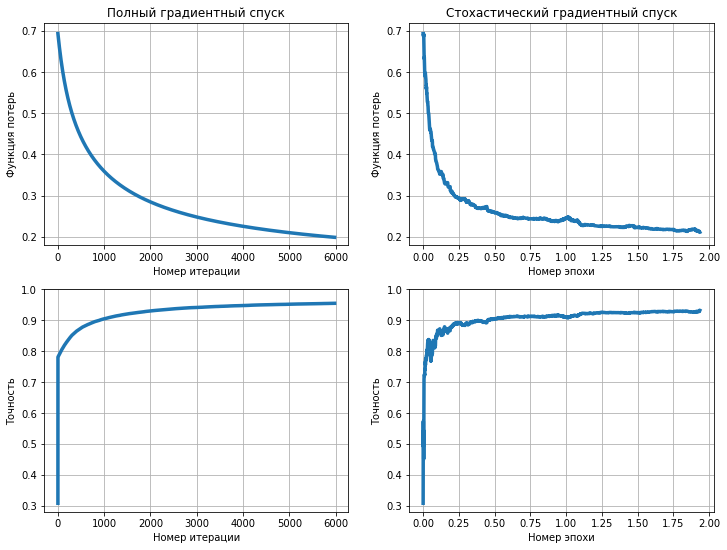

In [166]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 9))

ax1.plot(gd_history['func'], linewidth=3.5)
ax1.set_title("Полный градиентный спуск")
ax1.set_xlabel("Номер итерации")
ax1.set_ylabel("Функция потерь")
ax1.set_ylim(0.18, 0.72)
ax1.grid()

ax2.plot(sgd_history['epoch_num'], sgd_history['func'], linewidth=3.5)
ax2.set_title("Стохастический градиентный спуск")
ax2.set_xlabel("Номер эпохи")
ax2.set_ylabel("Функция потерь")
ax2.set_ylim(0.18, 0.72)
ax2.grid()

ax3.plot(gd_history['accuracy'], linewidth=3.5)
# ax3.set_title("Полный градиентный спуск")
ax3.set_xlabel("Номер итерации")
ax3.set_ylabel("Точность")
ax3.set_ylim(0.28, 1)
ax3.grid()

ax4.plot(sgd_history['epoch_num'], sgd_history['accuracy'], linewidth=3.5)
# ax4.set_title("Стохастический градиентный спуск")
ax4.set_xlabel("Номер эпохи")
ax4.set_ylabel("Точность")
ax4.set_ylim(0.28, 1)
ax4.grid()

plt.savefig("exp1_loss_accuracy_iternum.pdf")
plt.show()

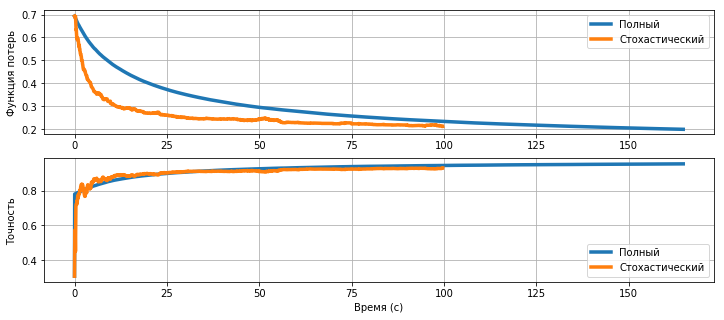

In [160]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 5))

ax1.plot(np.array(gd_history['time']).cumsum(), gd_history['func'], label='Полный', linewidth=3.5)
ax1.plot(np.array(sgd_history['time']).cumsum(), sgd_history['func'], label='Стохастический', linewidth=3.5)
# ax1.set_title("Градиентный спуск")
# ax1.set_xlabel("Время (с)")
ax1.set_ylabel("Функция потерь")
ax1.set_ylim(0.18, 0.72)
ax1.legend()
ax1.grid()

ax2.plot(np.array(gd_history['time']).cumsum(), gd_history['accuracy'], label='Полный', linewidth=3.5)
ax2.plot(np.array(sgd_history['time']).cumsum(), sgd_history['accuracy'], label='Стохастический', linewidth=3.5)
# ax2.set_title("Градиентный спуск")
ax2.set_xlabel("Время (с)")
ax2.set_ylabel("Точность")
ax2.legend()
ax2.grid()

plt.savefig("exp1_loss_accuracy_time.pdf")
plt.show()

## Experiment 2

Посмотрим, как влияет параметр step_alpha

In [63]:
step_alphas = [0.1, 1, 100, 1000]

Запускаем полный градиентный спуск

In [64]:
start_time = time.time()
gd_histories = []
for step_alpha in step_alphas:
    gd_clf = optimization.GDClassifier(
        loss_function='binary_logistic',
        max_iter=10000,
        l2_coef=1e-5,
        tolerance=1e-5,
        step_alpha=step_alpha,
        step_beta=0
    )
    
    hist = gd_clf.fit(X, y, trace=True)
    gd_histories.append(hist)

%telepyth "Success\nExperiment 2\nFull GD\ndiff. step_alpha\nFitting\ntime:\t{:.2f} s".format(time.time() - start_time)

'Success\nExperiment 2\nFull GD\ndiff. step_alpha\nFitting\ntime:\t427.30 s'

Запускаем стохастический градиентный спуск

In [65]:
start_time = time.time()
sgd_histories = []
for step_alpha in step_alphas:
    sgd_clf = optimization.SGDClassifier(
        loss_function='binary_logistic',
        max_iter=140000,
        l2_coef=1e-5,
        tolerance=1e-8,
        step_alpha=step_alpha,
        step_beta=0,
        batch_size=1
    )
    
    hist = sgd_clf.fit(X, y, log_freq=0.001, trace=True)
    sgd_histories.append(hist)

%telepyth "Success\nExperiment 2\nStochastic GD\ndiff. step_alpha\nFitting\ntime:\t{:.2f} s".format(time.time() - start_time)

'Success\nExperiment 2\nStochastic GD\ndiff. step_alpha\nFitting\ntime:\t382.06 s'

Посмотрим на зависимость значения функции от итерации (эпохи) метода

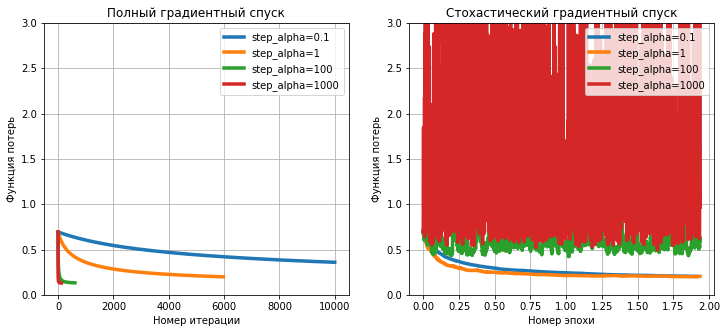

In [177]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

for history, step_alpha in zip(gd_histories, step_alphas):
    ax1.plot(
        history['func'],
        label='step_alpha={}'.format(step_alpha),
        linewidth=3.5
    )
ax1.set_title("Полный градиентный спуск")
ax1.set_xlabel("Номер итерации")
ax1.set_ylabel("Функция потерь")
ax1.set_ylim(0, 3)
ax1.legend()
ax1.grid()

for history, step_alpha in zip(sgd_histories, step_alphas):
    ax2.plot(
        history['epoch_num'],
        history['func'],
        label='step_alpha={}'.format(step_alpha),
        linewidth=3.5
    )
ax2.set_title("Стохастический градиентный спуск")
ax2.set_xlabel("Номер эпохи")
ax2.set_ylabel("Функция потерь")
ax2.set_ylim(0, 3)
ax2.legend()
ax2.grid()


# plt.savefig("exp2_loss_alpha_iternum.pdf")
plt.show()

Посмотрим на зависимость точности от итерации (эпохи) метода

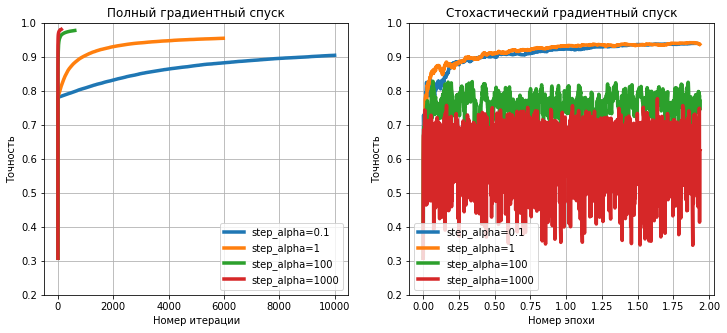

In [178]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

for history, step_alpha in zip(gd_histories, step_alphas):
    ax1.plot(
        history['accuracy'],
        label='step_alpha={}'.format(step_alpha),
        linewidth=3.5
    )
ax1.set_title("Полный градиентный спуск")
ax1.set_xlabel("Номер итерации")
ax1.set_ylabel("Точность")
ax1.set_ylim(0.2, 1)
ax1.legend()
ax1.grid()

for history, step_alpha in zip(sgd_histories, step_alphas):
    ax2.plot(
        history['epoch_num'],
        history['accuracy'],
        label='step_alpha={}'.format(step_alpha),
        linewidth=3.5
    )
ax2.set_title("Стохастический градиентный спуск")
ax2.set_xlabel("Номер эпохи")
ax2.set_ylabel("Точность")
ax2.set_ylim(0.2, 1)
ax2.legend()
ax2.grid()


# plt.savefig("exp2_accuracy_alpha_iternum.pdf")
plt.show()

Посмотрим по нормальному в табличке

In [68]:
print('Full')
print('step_alpha\taccuracy\t\tloss')
for history, step_alpha in zip(gd_histories, step_alphas):
    print('{}\t\t{}\t{}'.format(step_alpha, history['accuracy'][-1], history['func'][-1]))

print('')

print('Stochastic')
print('step_alpha\taccuracy\t\tloss')
for history, step_alpha in zip(sgd_histories, step_alphas):
    print('{}\t\t{}\t{}'.format(step_alpha, history['accuracy'][-1], history['func'][-1]))

Full
step_alpha	accuracy		loss
0.1		0.9049634208743034	0.35879313792477957
1		0.9550540043424747	0.19852590168572054
100		0.9779418882849991	0.13221990594053443
1000		0.9811779999723409	0.12996299388624716

Stochastic
step_alpha	accuracy		loss
0.1		0.9400074679500477	0.2036267636052007
1		0.9373521968219723	0.20385821925482975
100		0.770222240661605	0.598027840701437
1000		0.6254684755701226	0.9669088758076967


Посмотрим, что будет при других значениях step_beta

In [69]:
step_betas = [0, 0.01, 0.1, 0.5, 1, 2]

Запускаем полный градиентный спуск

In [70]:
start_time = time.time()
exp2_gd_beta_histories = []
for step_beta in step_betas:
    gd_clf = optimization.GDClassifier(
        loss_function='binary_logistic',
        max_iter=10000,
        l2_coef=1e-5,
        tolerance=1e-5,
        step_alpha=1,
        step_beta=step_beta
    )
    
    hist = gd_clf.fit(X, y, trace=True)
    exp2_gd_beta_histories.append(hist)

%telepyth "Experiment 2\nFull GD\nstep_beta\ntime:\t{:.2f} s".format(time.time() - start_time)

'Experiment 2\nFull GD\nstep_beta\ntime:\t587.15 s'

Запускаем стохастический градиентный спуск

In [71]:
start_time = time.time()
exp2_sgd_beta_histories = []
for step_beta in step_betas:
    sgd_clf = optimization.SGDClassifier(
        loss_function='binary_logistic',
        max_iter=140000,
        l2_coef=1e-5,
        tolerance=1e-8,
        step_alpha=1,
        step_beta=step_beta,
        batch_size=1
    )
    
    hist = sgd_clf.fit(X, y, log_freq=0.001, trace=True)
    exp2_sgd_beta_histories.append(hist)

%telepyth "Experiment 2\nStochastic GD\nstep_beta\ntime:\t{:.2f} s".format(time.time() - start_time)

'Experiment 2\nStochastic GD\nstep_beta\ntime:\t341.50 s'

Посмотрим на зависимость значения функции от итерации (эпохи) метода

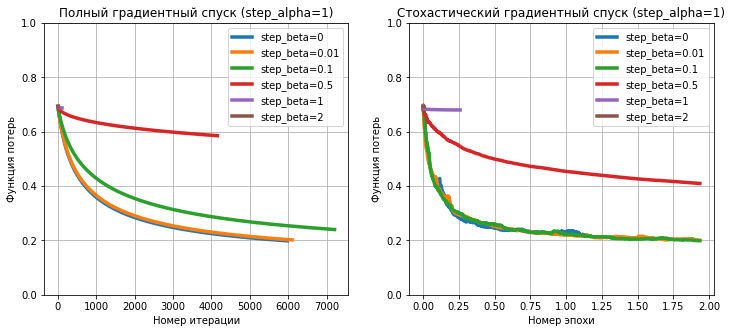

In [179]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

for history, step_beta in zip(exp2_gd_beta_histories, step_betas):
    ax1.plot(
        history['func'],
        label='step_beta={}'.format(step_beta),
        linewidth=3.5
    )
ax1.set_title("Полный градиентный спуск (step_alpha=1)")
ax1.set_xlabel("Номер итерации")
ax1.set_ylabel("Функция потерь")
ax1.set_ylim(0, 1)
ax1.legend()
ax1.grid()

for history, step_beta in zip(exp2_sgd_beta_histories, step_betas):
    ax2.plot(
        history['epoch_num'],
        history['func'],
        label='step_beta={}'.format(step_beta),
        linewidth=3.5
    )
ax2.set_title("Стохастический градиентный спуск (step_alpha=1)")
ax2.set_xlabel("Номер эпохи")
ax2.set_ylabel("Функция потерь")
ax2.set_ylim(0, 1)
ax2.legend()
ax2.grid()


plt.savefig("exp2_loss_beta_iternum.pdf")
plt.show()

Посмотрим на зависимость точности от итерации (эпохи) метода

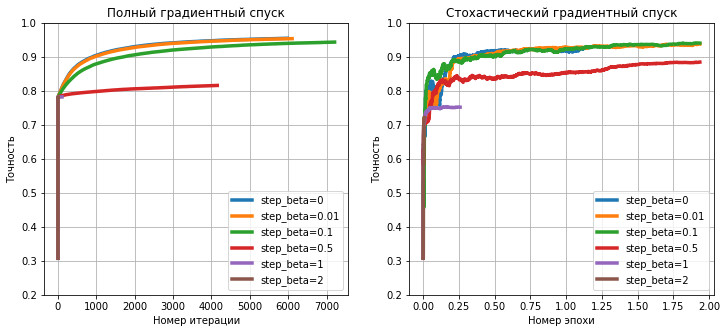

In [180]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

for history, step_beta in zip(exp2_gd_beta_histories, step_betas):
    ax1.plot(
        history['accuracy'],
        label='step_beta={}'.format(step_beta),
        linewidth=3.5
    )
ax1.set_title("Полный градиентный спуск")
ax1.set_xlabel("Номер итерации")
ax1.set_ylabel("Точность")
ax1.set_ylim(0.2, 1)
ax1.legend()
ax1.grid()

for history, step_beta in zip(exp2_sgd_beta_histories, step_betas):
    ax2.plot(
        history['epoch_num'],
        history['accuracy'],
        label='step_beta={}'.format(step_beta),
        linewidth=3.5
    )
ax2.set_title("Стохастический градиентный спуск")
ax2.set_xlabel("Номер эпохи")
ax2.set_ylabel("Точность")
ax2.set_ylim(0.2, 1)
ax2.legend()
ax2.grid()


plt.savefig("exp2_accuracy_beta_iternum.pdf")
plt.show()

Посмотрим по нормальному в табличке

In [74]:
print('Full')
print('step_beta\titers\tacc\tloss')
for history, step_beta in zip(exp2_gd_beta_histories, step_betas):
    print('{}\t\t{}\t{:.4f}\t{:.4f}'.format(step_beta, len(history['func']) - 1, history['accuracy'][-1], history['func'][-1]))

print('')

print('Stochastic')
print('step_beta\tepochs\tacc\tloss')
for history, step_beta in zip(exp2_sgd_beta_histories, step_betas):
    print('{}\t\t{:.4f}\t{:.4f}\t{:.4f}'.format(step_beta, history['epoch_num'][-1], history['accuracy'][-1], history['func'][-1]))

Full
step_beta	iters	acc	loss
0		5977	0.9551	0.1985
0.01		6102	0.9539	0.2020
0.1		7209	0.9438	0.2401
0.5		4152	0.8162	0.5855
1		108	0.7825	0.6874
2		11	0.7813	0.6914

Stochastic
step_beta	epochs	acc	loss
0		1.1509	0.9273	0.2182
0.01		1.9353	0.9382	0.2000
0.1		1.9353	0.9409	0.1995
0.5		1.9353	0.8850	0.4097
1		0.2584	0.7523	0.6800
2		0.0081	0.7219	0.6912


## Experiment 3

Посмотрим, как влияет random_seed в алгоритме стохастического градиентного спуска

In [75]:
random_seeds = np.random.randint(0, 2 ** 32, size=5)

In [76]:
start_time = time.time()
exp3_sgd_seed_histories = []
for seed in random_seeds:
    sgd_clf = optimization.SGDClassifier(
        loss_function='binary_logistic',
        max_iter=140000,
        l2_coef=1e-5,
        tolerance=1e-8,
        step_alpha=1,
        step_beta=0,
        batch_size=1,
        random_seed=seed
    )
    
    hist = sgd_clf.fit(X, y, log_freq=0.001, trace=True)
    exp3_sgd_seed_histories.append(hist)

%telepyth "Success\nExperiment 3\nStochastic GD\nFitting\ntime:\t{:.2f} s".format(time.time() - start_time)

'Success\nExperiment 3\nStochastic GD\nFitting\ntime:\t427.39 s'

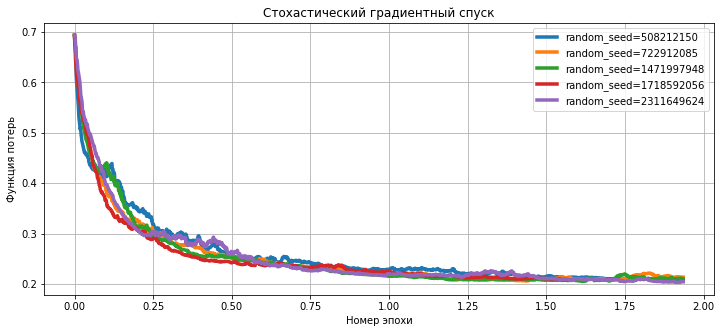

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

for history, random_seed in zip(exp3_sgd_seed_histories, random_seeds):
    ax.plot(
        history['epoch_num'],
        history['func'],
        label='random_seed={}'.format(random_seed),
        linewidth=3.5
    )
ax.set_title("Стохастический градиентный спуск")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Функция потерь")
#ax.set_ylim(0.25, 0.75)
ax.legend()
ax.grid()

plt.savefig("exp3_loss_iternum.pdf")
plt.show()

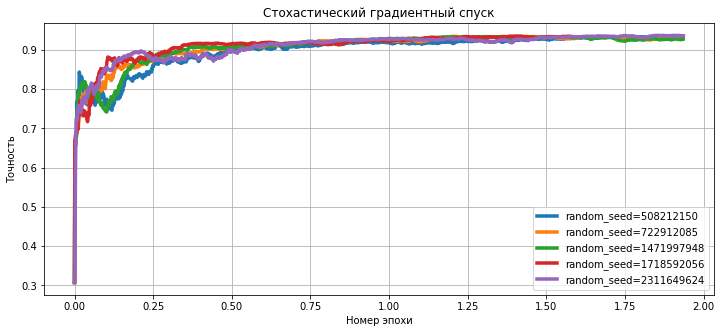

In [184]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

for history, random_seed in zip(exp3_sgd_seed_histories, random_seeds):
    ax.plot(
        history['epoch_num'],
        history['accuracy'],
        label='random_seed={}'.format(random_seed),
        linewidth=3.5
    )
ax.set_title("Стохастический градиентный спуск")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Точность")
# ax.set_ylim(0.25, 0.9)
ax.legend()
ax.grid()

plt.savefig("exp3_accuracy_iternum.pdf")
plt.show()

## Experiment 4

Посмотрим, что будет, если изменим batch_size

In [187]:
batch_sizes = [1, 5, 10, 20, 50, 100]

In [188]:
start_time = time.time()
exp4_sgd_batch_histories = []
for batch_size in batch_sizes:
    sgd_clf = optimization.SGDClassifier(
        loss_function='binary_logistic',
        max_iter=140000,
        l2_coef=1e-5,
        tolerance=1e-5,
        step_alpha=1,
        step_beta=0,
        batch_size=batch_size
    )
    
    hist = sgd_clf.fit(X, y, log_freq=0.001, trace=True)
    exp4_sgd_batch_histories.append(hist)

%telepyth "Success\nExperiment 4\nStochastic GD\nFitting\ntime:\t{:.2f} s".format(time.time() - start_time)

'Success\nExperiment 4\nStochastic GD\nFitting\ntime:\t156.03 s'

In [190]:
history.keys()

dict_keys(['epoch_num', 'time', 'func', 'weights_diff', 'accuracy'])

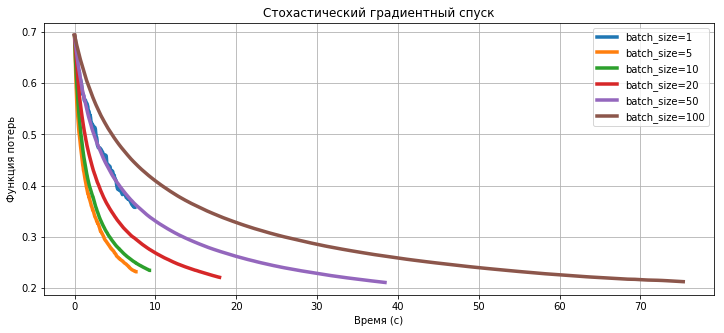

In [195]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

for history, batch_size in zip(exp4_sgd_batch_histories, batch_sizes):
    ax.plot(
        np.array(history['time']).cumsum(),
        history['func'],
        label='batch_size={}'.format(batch_size),
        linewidth=3.5
    )
ax.set_title("Стохастический градиентный спуск")
ax.set_xlabel("Время (с)")
ax.set_ylabel("Функция потерь")
ax.legend()
ax.grid()

plt.savefig("exp4_loss_time.pdf")
plt.show()

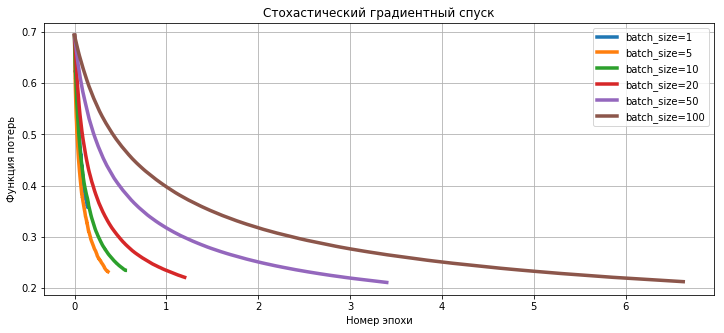

In [189]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

for history, batch_size in zip(exp4_sgd_batch_histories, batch_sizes):
    ax.plot(
        history['epoch_num'],
        history['func'],
        label='batch_size={}'.format(batch_size),
        linewidth=3.5
    )
ax.set_title("Стохастический градиентный спуск")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Функция потерь")
ax.legend()
ax.grid()

plt.savefig("exp4_loss_iternum.pdf")
plt.show()

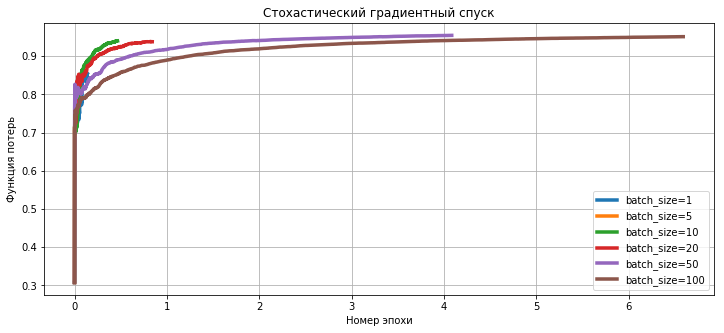

In [301]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

for history, batch_size in zip(exp4_sgd_batch_histories, batch_sizes):
    ax.plot(
        history['epoch_num'],
        history['accuracy'],
        label='batch_size={}'.format(batch_size),
        linewidth=3.5
    )
ax.set_title("Стохастический градиентный спуск")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Функция потерь")
ax.legend()
ax.grid()

# plt.savefig("exp4_accuracy_iternum.png")
plt.show()

Посмотрим по нормальному в табличке

In [299]:
print('Stochastic')
print('batch_size\tepochs\tacc\tloss')
for history, batch_size in zip(exp4_sgd_batch_histories, batch_sizes):
    print('{}\t\t{:.4f}\t{:.4f}\t{:.4f}'.format(batch_size, history['epoch_num'][-1], history['accuracy'][-1], history['func'][-1]))

Stochastic
batch_size	epochs	acc	loss
1		0.1393	0.8551	0.3559
5		0.0332	0.8318	0.4944
10		0.4658	0.9400	0.2467
20		0.8419	0.9380	0.2494
50		4.0852	0.9546	0.1994
100		6.5925	0.9512	0.2128


Лучшее качество показывает batch_size=50

Посмотрим, как изменится качество при изменении step_alpha и step_beta

In [302]:
step_alphas = [0.1, 1, 100, 1000]

In [303]:
start_time = time.time()
exp4_sgd_alpha_histories = []
for step_alpha in step_alphas:
    sgd_clf = optimization.SGDClassifier(
        loss_function='binary_logistic',
        max_iter=140000,
        l2_coef=1e-5,
        tolerance=1e-5,
        step_alpha=step_alpha,
        step_beta=0,
        batch_size=50
    )
    
    hist = sgd_clf.fit(X, y, log_freq=0.001, trace=True)
    exp4_sgd_alpha_histories.append(hist)

%telepyth "Success\nExperiment 4\nStochastic GD\nalpha\nFitting\ntime:\t{:.2f} s".format(time.time() - start_time)

'Success\nExperiment 4\nStochastic GD\nalpha\nFitting\ntime:\t149.47 s'

Посмотрим на зависимость значения функции от итерации (эпохи) метода

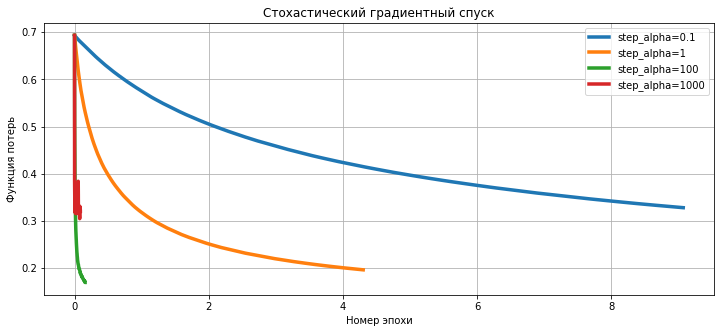

In [307]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

for history, step_alpha in zip(exp4_sgd_alpha_histories, step_alphas):
    ax.plot(
        history['epoch_num'],
        history['func'],
        label='step_alpha={}'.format(step_alpha),
        linewidth=3.5
    )
ax.set_title("Стохастический градиентный спуск")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Функция потерь")
# ax.set_ylim(0, 3)
ax.legend()
ax.grid()


# plt.savefig("exp4_loss_alpha_iternum.png")
plt.show()

Посмотрим на зависимость точности от итерации (эпохи) метода

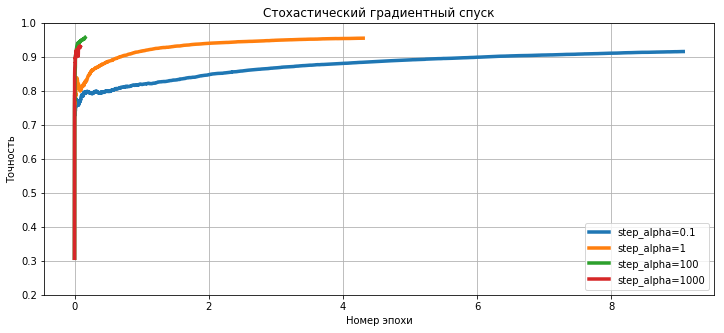

In [310]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

for history, step_alpha in zip(exp4_sgd_alpha_histories, step_alphas):
    ax.plot(
        history['epoch_num'],
        history['accuracy'],
        label='step_alpha={}'.format(step_alpha),
        linewidth=3.5
    )
ax.set_title("Стохастический градиентный спуск")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Точность")
ax.set_ylim(0.2, 1)
ax.legend()
ax.grid()


# plt.savefig("exp4_accuracy_alpha_iternum.png")
plt.show()

Посмотрим по нормальному в табличке

In [313]:
print('Stochastic')
print('step_alpha\tepochs\tacc\tloss')
for history, step_alpha in zip(exp4_sgd_alpha_histories, step_alphas):
    print('{}\t\t{:.4f}\t{:.4f}\t{:.4f}'.format(step_alpha, history['epoch_num'][-1], history['accuracy'][-1], history['func'][-1]))

Stochastic
step_alpha	epochs	acc	loss
0.1		9.0722	0.9160	0.3280
1		4.3024	0.9553	0.1963
100		0.1577	0.9574	0.1696
1000		0.0871	0.9305	0.3202


Теперь step_beta

In [314]:
step_betas = [0, 0.01, 0.1, 0.5, 1, 2]

In [315]:
start_time = time.time()
exp4_sgd_beta_histories = []
for step_beta in step_betas:
    sgd_clf = optimization.SGDClassifier(
        loss_function='binary_logistic',
        max_iter=140000,
        l2_coef=1e-5,
        tolerance=1e-5,
        step_alpha=1,
        step_beta=step_beta,
        batch_size=50
    )
    
    hist = sgd_clf.fit(X, y, log_freq=0.001, trace=True)
    exp4_sgd_beta_histories.append(hist)

%telepyth "Success\nExperiment 4\nStochastic GD\nbeta\nFitting\ntime:\t{:.2f} s".format(time.time() - start_time)

'Success\nExperiment 4\nStochastic GD\nbeta\nFitting\ntime:\t182.93 s'

Посмотрим на зависимость значения функции от итерации (эпохи) метода

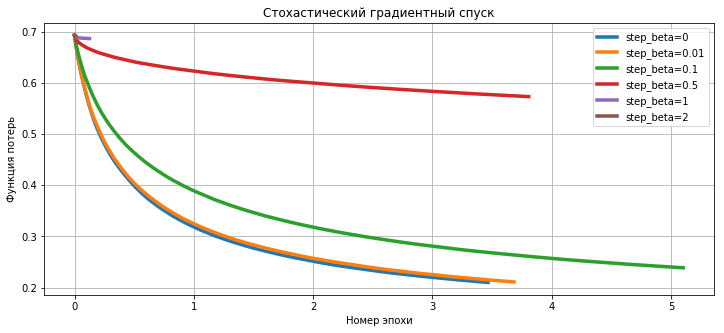

In [316]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

for history, step_beta in zip(exp4_sgd_beta_histories, step_betas):
    ax.plot(
        history['epoch_num'],
        history['func'],
        label='step_beta={}'.format(step_beta),
        linewidth=3.5
    )
ax.set_title("Стохастический градиентный спуск")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Функция потерь")
# ax.set_ylim(0, 3)
ax.legend()
ax.grid()


# plt.savefig("exp4_loss_beta_iternum.png")
plt.show()

Посмотрим на зависимость точности от итерации (эпохи) метода

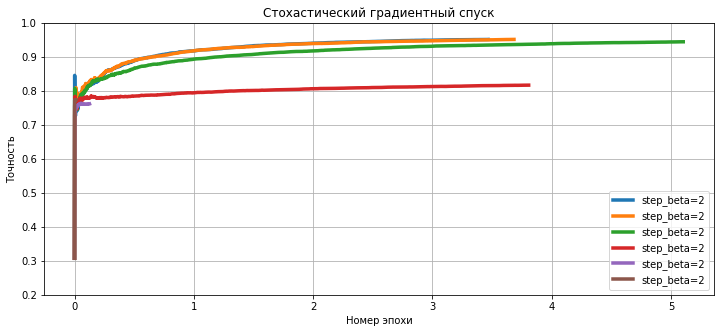

In [317]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

for history, step_alpha in zip(exp4_sgd_beta_histories, step_betas):
    ax.plot(
        history['epoch_num'],
        history['accuracy'],
        label='step_beta={}'.format(step_beta),
        linewidth=3.5
    )
ax.set_title("Стохастический градиентный спуск")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Точность")
ax.set_ylim(0.2, 1)
ax.legend()
ax.grid()


# plt.savefig("exp4_accuracy_beta_iternum.png")
plt.show()

Посмотрим по нормальному в табличке

In [319]:
print('Stochastic')
print('step_alpha\tepochs\tacc\tloss')
for history, step_beta in zip(exp4_sgd_beta_histories, step_betas):
    print('{}\t\t{:.4f}\t{:.4f}\t{:.4f}'.format(step_beta, history['epoch_num'][-1], history['accuracy'][-1], history['func'][-1]))

Stochastic
step_alpha	epochs	acc	loss
0		3.4671	0.9515	0.2100
0.01		3.6842	0.9517	0.2109
0.1		5.1031	0.9447	0.2386
0.5		3.8073	0.8171	0.5733
1		0.1258	0.7618	0.6869
2		0.0111	0.7741	0.6913


## Experiment 5

# КОНСТАНТНЫЙ ПРИЗНАК

In [196]:
from sklearn.datasets import make_blobs

In [223]:
import multiclass

In [279]:
import importlib
importlib.reload(multiclass)

<module 'multiclass' from '/Users/nick/Documents/contests/prac_contests/task2_new/multiclass.py'>

In [326]:
blobs_X, blobs_y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=1, center_box=(-2, 2))
blobs_X_train = np.hstack((blobs_X, np.zeros((blobs_X.shape[0], 1))))

In [327]:
multinomial_regression = optimization.GDClassifier(
    loss_function='multinomial_logistic'
)

multinomial_regression.fit(blobs_X_train, blobs_y)

In [328]:
bin_clf = optimization.GDClassifier(loss_function='binary_logistic')

In [329]:
ova_reg = multiclass.MulticlassStrategy(
    classifier=bin_clf,
    mode='one_vs_all'
)

ova_reg.fit(blobs_X_train, blobs_y)

In [330]:
ava_reg = multiclass.MulticlassStrategy(
    classifier=bin_clf,
    mode='all_vs_all',
    class_number=3
)

ava_reg.fit(blobs_X_train, blobs_y)

In [331]:
h = 0.05
x_min, x_max = blobs_X[:, 0].min() - .5, blobs_X[:, 0].max() + .5
y_min, y_max = blobs_X[:, 1].min() - .5, blobs_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z_mul_reg = multinomial_regression.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.size)])
Z_mul_reg = Z_mul_reg.reshape(xx.shape[0], yy.shape[1])
acc_mul_reg = (multinomial_regression.predict(blobs_X_train) == blobs_y).sum() / len(blobs_y)

Z_ova = ova_reg.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.size)])
Z_ova = Z_ova.reshape(xx.shape[0], yy.shape[1])
acc_ova = (ova_reg.predict(blobs_X_train) == blobs_y).sum() / len(blobs_y)

Z_ava = ava_reg.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.size)])
Z_ava = Z_ava.reshape(xx.shape[0], yy.shape[1])
acc_ava = (ava_reg.predict(blobs_X_train) == blobs_y).sum() / len(blobs_y)

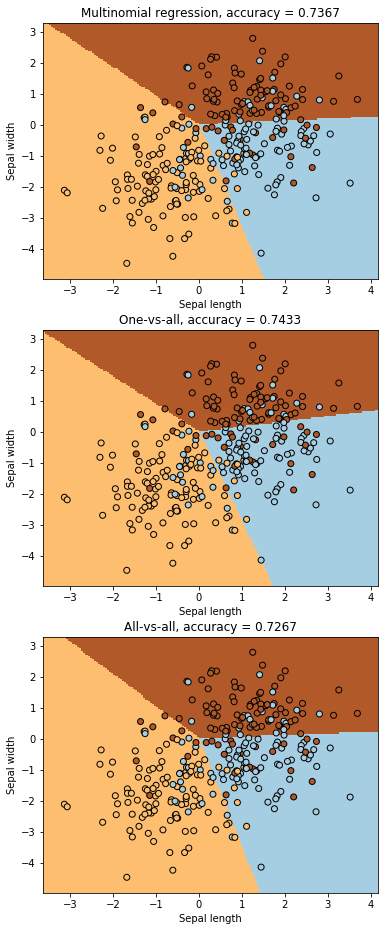

In [332]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,16))

ax1.pcolor(xx, yy, Z_mul_reg, cmap=plt.cm.Paired)
ax1.scatter(blobs_X[:, 0], blobs_X[:, 1], c=blobs_y, edgecolors='k', cmap=plt.cm.Paired)
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
accuracy = ()
ax1.set_title('Multinomial regression, accuracy = {:.4f}'.format(acc_mul_reg))

ax2.pcolor(xx, yy, Z_ova, cmap=plt.cm.Paired)
ax2.scatter(blobs_X[:, 0], blobs_X[:, 1], c=blobs_y, edgecolors='k', cmap=plt.cm.Paired)
ax2.set_xlabel('Sepal length')
ax2.set_ylabel('Sepal width')
ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_title('One-vs-all, accuracy = {:.4f}'.format(acc_ova))

ax3.pcolor(xx, yy, Z_ava, cmap=plt.cm.Paired)
ax3.scatter(blobs_X[:, 0], blobs_X[:, 1], c=blobs_y, edgecolors='k', cmap=plt.cm.Paired)
ax3.set_xlabel('Sepal length')
ax3.set_ylabel('Sepal width')
ax3.set_xlim(xx.min(), xx.max())
ax3.set_ylim(yy.min(), yy.max())
ax3.set_title('All-vs-all, accuracy = {:.4f}'.format(acc_ava))

plt.savefig("exp5_one.png")
plt.show()

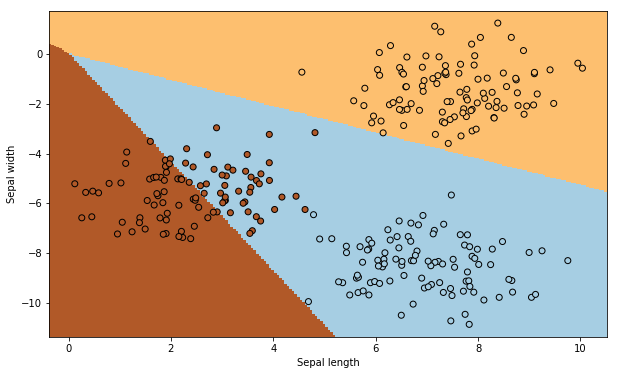

In [216]:
plt.figure(1, figsize=(10, 6))
plt.pcolor(xx, yy, Z_mul_reg, cmap=plt.cm.Paired)

plt.scatter(blobs_X[:, 0], blobs_X[:, 1], c=blobs_y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [205]:
?optimization.GDClassifier

## Experiment 6

Загрузим датасет

In [427]:
from sklearn.datasets import fetch_20newsgroups

In [428]:
data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

In [429]:
collection = data['data']
y = data['target']

Приведем его в порядок

In [430]:
import re

In [431]:
for i in range(len(collection)):
    collection[i] = collection[i].lower()
    collection[i] = re.sub('[^a-zA-Z0-9 ]', ' ', collection[i])
    collection[i] = re.sub('[ ]+', ' ', collection[i]).strip()

## Experiment 7

Преобразуем датасет в матрицу

In [432]:
from sklearn.model_selection import train_test_split

In [433]:
col_train, col_val, y_train, y_val = train_test_split(collection, y, train_size=0.7)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [434]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [435]:
cv = CountVectorizer()

In [436]:
cv.fit(col_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [437]:
counts_train = cv.transform(col_train)
counts_val = cv.transform(col_val)

In [438]:
tfidf_transformer = TfidfTransformer()

In [439]:
tfidf_transformer.fit(counts_train)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [440]:
X_train = tfidf_transformer.transform(counts_train)
X_val = tfidf_transformer.transform(counts_val)

## Experiment 8

Подбираем step_alpha

In [35]:
step_alphas = [0.1, 1, 100, 1000]

In [23]:
start_time = time.time()

accuracies_validate = []
exp8_sgd_alphas_histories = []

for step_alpha in step_alphas:
    sgd_clf = optimization.SGDClassifier(
        loss_function='multinomial_logistic',
        step_alpha=step_alpha,
        step_beta=0,
        tolerance=1e-05,
        max_iter=4000,
        batch_size=50,
        class_number=len(np.unique(y))
    )
    
    hist = sgd_clf.fit(X_train, y_train, trace=True)
    exp8_sgd_alphas_histories.append(hist)
    
    y_pred = sgd_clf.predict(X_val)
    accuracies_validate.append((y_pred == y_val).sum() / len(y_pred))

%telepyth "Success\nExperiment 8\nStochastic GD\nFitting\ntime:\t{:.2f} s".format(time.time() - start_time)

'Success\nExperiment 8\nStochastic GD\nFitting\ntime:\t897.37 s'

In [30]:
accuracies_validate

[0.31840942562592045,
 0.57201767304860085,
 0.59646539027982326,
 0.5192930780559647]

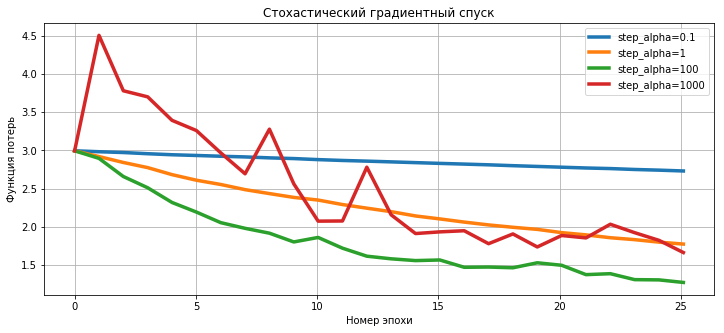

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

for history, step_alpha in zip(exp8_sgd_alphas_histories, step_alphas):
    ax.plot(
        history['epoch_num'],
        history['func'],
        label='step_alpha={}'.format(step_alpha),
        linewidth=3.5
    )
ax.set_title("Стохастический градиентный спуск")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Функция потерь")
# ax.set_ylim(0, 3)
ax.legend()
ax.grid()

# plt.savefig("exp8_loss_alpha_iternum.png")
plt.show()

Подбираем step_beta

In [32]:
step_betas = [0, 0.01, 0.1, 0.5, 1, 2]

In [33]:
start_time = time.time()

accuracies_validate = []
exp8_sgd_betas_histories = []

for step_beta in step_betas:
    sgd_clf = optimization.SGDClassifier(
        loss_function='multinomial_logistic',
        step_alpha=100,
        step_beta=step_beta,
        tolerance=1e-05,
        max_iter=4000,
        batch_size=50,
        class_number=len(np.unique(y))
    )
    
    hist = sgd_clf.fit(X_train, y_train, trace=True)
    exp8_sgd_betas_histories.append(hist)
    
    y_pred = sgd_clf.predict(X_val)
    accuracies_validate.append((y_pred == y_val).sum() / len(y_pred))

%telepyth "Success\nExperiment 8\nStochastic GD\nFitting\ntime:\t{:.2f} s".format(time.time() - start_time)

'Success\nExperiment 8\nStochastic GD\nFitting\ntime:\t1228.73 s'

In [42]:
accuracies_validate

[0.58350515463917529,
 0.58379970544919002,
 0.57025036818851249,
 0.56377025036818851,
 0.30456553755522825,
 0.11723122238586156]

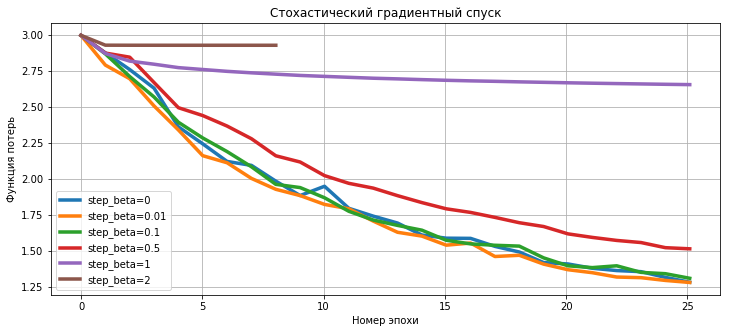

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

for history, step_beta in zip(exp8_sgd_betas_histories, step_betas):
    ax.plot(
        history['epoch_num'],
        history['func'],
        label='step_beta={}'.format(step_beta),
        linewidth=3.5
    )
ax.set_title("Стохастический градиентный спуск")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Функция потерь")
# ax.set_ylim(0, 3)
ax.legend()
ax.grid()

# plt.savefig("exp8_loss_beta_iternum.png")
plt.show()

Подбираем batch_size

In [43]:
batch_sizes = [1, 5, 10, 20, 50, 100]

In [44]:
start_time = time.time()

accuracies_validate_batch = []
exp8_sgd_batch_histories = []

for batch_size in batch_sizes:
    sgd_clf = optimization.SGDClassifier(
        loss_function='multinomial_logistic',
        step_alpha=100,
        step_beta=0.01,
        tolerance=1e-05,
        max_iter=4000,
        batch_size=batch_size,
        class_number=len(np.unique(y))
    )
    
    hist = sgd_clf.fit(X_train, y_train, trace=True)
    exp8_sgd_batch_histories.append(hist)
    
    y_pred = sgd_clf.predict(X_val)
    accuracies_validate_batch.append((y_pred == y_val).sum() / len(y_pred))

%telepyth "Success\nExperiment 8\nStochastic GD\nFitting\ntime:\t{:.2f} s".format(time.time() - start_time)

'Success\nExperiment 8\nStochastic GD\nFitting\ntime:\t1246.52 s'

During request exception was raised: <urlopen error [Errno 8] nodename nor servname provided, or not known>
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/urllib/request.py", line 1318, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/http/client.py", line 1239, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/http/client.py", line 1285, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/http/client.py", line 1234, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.fram

In [45]:
accuracies_validate_batch

[0.053902798232695143,
 0.055081001472754049,
 0.13195876288659794,
 0.35198821796759944,
 0.58291605301914584,
 0.66568483063328421]

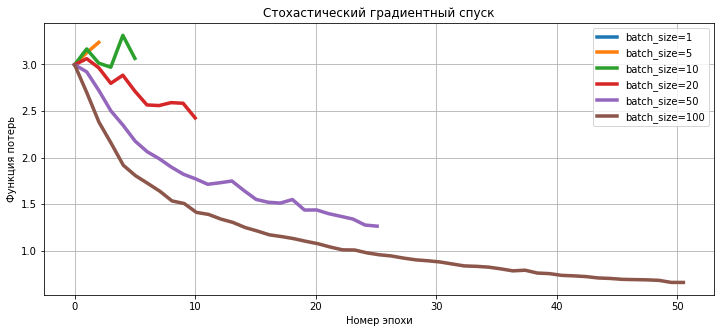

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

for history, batch_size in zip(exp8_sgd_batch_histories, batch_sizes):
    ax.plot(
        history['epoch_num'],
        history['func'],
        label='batch_size={}'.format(batch_size),
        linewidth=3.5
    )
ax.set_title("Стохастический градиентный спуск")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Функция потерь")
# ax.set_ylim(0, 3)
ax.legend()
ax.grid()

# plt.savefig("exp8_loss_batch_iternum.png")
plt.show()

Можно подсчитать, что оптимальный max_iter будет 2000

Подбираем $\lambda_2$

In [337]:
lambdas = [0, 0.5, 1]

In [383]:
start_time = time.time()

accuracies_validate_batch = []
exp8_sgd_lambdas_histories = []

for lambda_ in lambdas:
    sgd_clf = optimization.SGDClassifier(
        loss_function='multinomial_logistic',
        step_alpha=100,
        step_beta=0.01,
        tolerance=1e-05,
        max_iter=2000,
        batch_size=100,
        class_number=len(np.unique(y)),
        l2_coef=lambda_
    )
    
    hist = sgd_clf.fit(X_train, y_train, trace=True)
    exp8_sgd_lambdas_histories.append(hist)
    
    y_pred = sgd_clf.predict(X_val)
    accuracies_validate_batch.append((y_pred == y_val).sum() / len(y_pred))

%telepyth "Success\nExperiment 8\nStochastic GD\nFitting\ntime:\t{:.2f} s".format(time.time() - start_time)

/Users/nick/Documents/contests/prac_contests/task2_new/optimization.py:323: RuntimeWarning: overflow encountered in multiply
  self.w = self.w - self.step_alpha / ((i + 1) ** self.step_beta) * grad
/Users/nick/Documents/contests/prac_contests/task2_new/oracles.py:131: RuntimeWarning: invalid value encountered in subtract
  - logsumexp(margins - np.max(margins, axis=0), axis=0)
/Users/nick/Documents/contests/prac_contests/task2_new/optimization.py:323: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - self.step_alpha / ((i + 1) ** self.step_beta) * grad


'Success\nExperiment 8\nStochastic GD\nFitting\ntime:\t389.66 s'

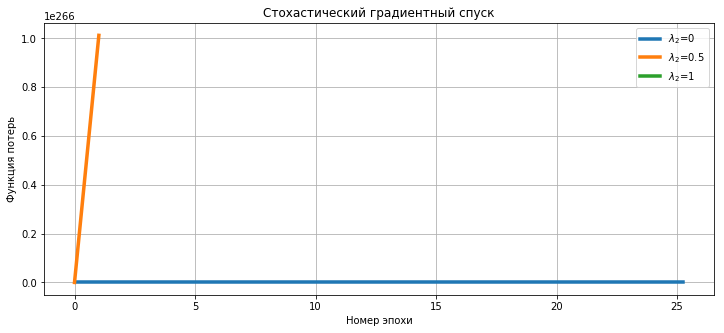

In [384]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

for history, lambda_ in zip(exp8_sgd_lambdas_histories, lambdas):
    ax.plot(
        history['epoch_num'],
        history['func'],
        label='$\lambda_2$={}'.format(lambda_),
        linewidth=3.5
    )
ax.set_title("Стохастический градиентный спуск")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Функция потерь")
# ax.set_ylim(0, 3)
ax.legend()
ax.grid()

# plt.savefig("exp8_loss_batch_iternum.png")
plt.show()

In [385]:
accuracies_validate_batch

[0.62533136966126657, 0.041826215022091308, 0.041826215022091308]

## Experiment 9

In [441]:
from sklearn.datasets import fetch_20newsgroups

In [442]:
data_test = fetch_20newsgroups(subset='test')

In [443]:
collection_test = data_test['data']
y_test = data_test['target']

In [444]:
import re

In [445]:
for i in range(len(collection_test)):
    collection_test[i] = collection_test[i].lower()
    collection_test[i] = re.sub('[^a-zA-Z0-9 ]', ' ', collection[i])
    collection_test[i] = re.sub('[ ]+', ' ', collection[i]).strip()

In [446]:
counts_test = cv.transform(collection_test)

In [447]:
X_test = tfidf_transformer.transform(counts_test)

In [448]:
# adding constant feature
X_train = scipy.sparse.hstack((np.zeros((X_train.shape[0], 1)), X_train), format='csr')
X_test = scipy.sparse.hstack((np.zeros((X_test.shape[0], 1)), X_test), format='csr')

In [460]:
X_val = scipy.sparse.hstack((np.zeros((X_val.shape[0], 1)), X_val), format='csr')

In [470]:
sgd_clf = optimization.SGDClassifier(
    loss_function='multinomial_logistic',
    step_alpha=100,
    step_beta=0.01,
    tolerance=1e-05,
    max_iter=2000,
    batch_size=100,
    class_number=len(np.unique(y))
)

In [471]:
start_time = time.time()
sgd_clf.fit(X_train, y_train)
%telepyth "Success\nExperiment 9\nFitting\ntime:\t{:.2f} s".format(time.time() - start_time)

'Success\nExperiment 9\nFitting\ntime:\t118.98 s'

In [472]:
y_pred = sgd_clf.predict(X_test)